In [1]:
# Библиотеки
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Чтоб числа вещественные выводились норм
pd.options.display.float_format ='{:,.2f}'.format

In [2]:
# sklearn.model_selection.GridSearchCV

**Загружаем данные**

In [3]:
df_2019_full = pd.read_csv('database/df_2019_full.csv')
df_2020_full = pd.read_csv('database/df_2020_full.csv')
df_2021_full = pd.read_csv('database/df_2021_full.csv')

In [4]:
target_2019_01_full = pd.read_csv('database/target_2019_01_full.csv')
target_2019_01_full = target_2019_01_full['target_2019 01']

target_2020_01_full = pd.read_csv('database/target_2020_01_full.csv')
target_2020_01_full = target_2020_01_full['target_2020 01']

target_2021_01_full = pd.read_csv('database/target_2021_01_full.csv')
target_2021_01_full = target_2021_01_full['target_2021 01']


**Считываем файлы со списками признаков**

Создадим словарь, в котором ключи имя файла, а значения:
- fs_zero - список признаков нулевой значимости, отобраный библеотекой Feature selector 
- fs_collinear - список признаков, отобранных для удаленния, имеющие высокую коореляцию
- 'f_for_pastreded_client_2020' - 'f_for_pastreded_client_2021' - признаки клиентов, с которыми долго сотрудничают, т.е. есть по ним такие данные
- остальные - списки признаков, ранжированные разными методами (важные - в начале)



In [5]:
importances_feature_19 = {}

for name_file in os.listdir('feature_list/2019'):
    path_to_file = 'feature_list/2019/' + name_file
    name_file = name_file.strip('.txt')
    file = open(path_to_file, 'r')
    importances_feature_19[name_file] = [line.strip() for line in file]
    file.close()
    
importances_feature_19.keys()

dict_keys(['fs_collinear', 'fs_importances', 'fs_zero', 'f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances', 'f_pi_ra_importances', 'f_rfe_importances'])

In [6]:
importances_feature_20 = {}

for name_file in os.listdir('feature_list/2020'):
    path_to_file = 'feature_list/2020/' + name_file
    name_file = name_file.strip('.txt')
    file = open('feature_list/2019/f_rfe_importances.txt', 'r')
    importances_feature_20[name_file] = [line.strip() for line in file]
    file.close()
    
importances_feature_20.keys()

dict_keys(['fs_collinear', 'fs_importances', 'fs_zero', 'f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances', 'f_pi_ra_importances', 'f_rfe_importances'])

In [7]:
# Считаем список признаков для клиентов, которыми давно работают
file = open('feature_list/f_for_pastreded_client.txt', 'r')
list_f_for_pastreded_client = [line.strip() for line in file]
file.close()

**Тестирование разных моделей ML**

In [8]:
# Импортирование необходимых модулей и атрибутов
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score

Линейные алгоритмы:

    — Логистическая регрессия* / Logistic Regression (‘LR’)
    — Линейный дискриминантный анализ / Linear Discriminant Analysis (‘LDA’)

Нелинейные алгоритмы:

    — Метод k-ближайших соседей (классификация) / K-Neighbors Classifier (‘KNN’)
    — Деревья принятия решений / Decision Tree Classifier (‘CART’)
    — Наивный классификатор Байеса / Naive Bayes Classifier (‘NB’)
    — Линейный метод опорных векторов (классификация) / Linear Support Vector Classification (‘LSVC’)
    — Метод опорных векторов (классификация) / C-Support Vector Classification (‘SVC’)

Алгоритм искусственной нейронной сети:

    — Многослойный персептрон / Multilayer Perceptrons (‘MLP’)

Ансамблевые алгоритмы:

    — Bagging (классификация) / Bagging Classifier (‘BG’) (Bagging = Bootstrap aggregating)
    — Случайный лес (классификация) / Random Forest Classifier (‘RF’)
    — Экстра-деревья (классификация) / Extra Trees Classifier (‘ET’)
    — AdaBoost (классификация) / AdaBoost Classifier (‘AB’) (AdaBoost = Adaptive Boosting)
    — Градиентный boosting (классификация) / Gradient Boosting Classifier (‘GB’)

Таким образом, список ‘models’ содержит следующие модели:


In [9]:
# На будущее автоматизировать функцию ml_tester
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier(random_state=42)))
# models.append(('NB', GaussianNB()))
# models.append(('LSVC', LinearSVC(random_state=42)))
# models.append(('SVC', SVC(random_state=42)))
# models.append(('MLP', MLPClassifier(random_state=42)))
# models.append(('BG', BaggingClassifier(n_estimators=100, random_state=42)))
# models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=42)))
# models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=42)))
# models.append(('AB', AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)))
# models.append(('GB', GradientBoostingClassifier(n_estimators=100, random_state=42)))

In [10]:
def metrics(y_test, y_pred):
    """Комплексный расчет метрик"""
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred).round(4)
    recall = recall_score(y_test, y_pred).round(4)
    roc_auc = roc_auc_score(y_test, y_pred).round(4)
    f1 = f1_score(y_test, y_pred).round(4)
    
    # Если необходимо вывести метрики на печать - раскомментировать
    #print('Матрица:')
    #print(conf_matrix)
    #print('точность (precision) - ', precision)
    #print('полнота (recall) -', recall)
    #print('roc_auc - ', roc_auc)
    #print('f1_score - ', f1)
    
    return {'conf_matrix': conf_matrix, 'precision': precision, 'recall': recall, 'roc_auc': roc_auc, 'f1': f1}

In [11]:
def ml_train(ml, X_train, X_test, y_train,  y_test):
    """Функция обучает переданную ей модель и считает метрики"""
    ml.fit(X_train, y_train)
    y_pred = ml.predict(X_test)
    return metrics(y_test, y_pred)
   

In [12]:
# Оценивание эффективности выполнения каждого алгоритма

def ml_tester(X_train, X_test, y_train, y_test, features_list):
    """Функция проводит обучение на разных моделях, и возвращает метрики
    feature - список признаков,
    n_feature - количество признаков, которые необходимо взять для обучения модели
    """
    
    X_train = X_train[features_list]
    X_test = X_test[features_list]
    
    metrixs_list = {}
    
    # Список моделей машинного обучения
    ml_LR = LogisticRegression( max_iter=2000, random_state=42)
    metrixs_list['ml_LR'] = ml_train(ml_LR, X_train, X_test, y_train, y_test)
    
    ml_LDA = LinearDiscriminantAnalysis()
    metrixs_list['ml_LDA'] = ml_train(ml_LDA, X_train, X_test, y_train, y_test)
    
    ml_KNN = KNeighborsClassifier()
    metrixs_list['ml_KNN'] = ml_train(ml_KNN, X_train, X_test, y_train, y_test)
    
    ml_CART = DecisionTreeClassifier(random_state=42)
    metrixs_list['ml_CART'] = ml_train(ml_CART, X_train, X_test, y_train, y_test)
    
    ml_NB = GaussianNB()
    metrixs_list['ml_NB'] = ml_train(ml_NB, X_train, X_test, y_train, y_test)
    
    ml_LSVC = LinearSVC(max_iter=100000, random_state=42)
    metrixs_list['ml_LSVC'] = ml_train(ml_LSVC, X_train, X_test, y_train, y_test)
    
    ml_SVC = SVC(random_state=42)
    metrixs_list['ml_SVC'] = ml_train(ml_SVC, X_train, X_test, y_train, y_test)
    
    ml_MLP = MLPClassifier(max_iter=2000, random_state=42)
    metrixs_list['ml_MLP'] = ml_train(ml_MLP, X_train, X_test, y_train, y_test)
    
    ml_BG = BaggingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_BG'] = ml_train(ml_BG, X_train, X_test, y_train, y_test)
    
    ml_RF = RandomForestClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_RF'] = ml_train(ml_RF, X_train, X_test, y_train, y_test)
    
    ml_ET = ExtraTreesClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_ET'] = ml_train(ml_ET, X_train, X_test, y_train, y_test)
    
    ml_AB = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
    metrixs_list['ml_AB'] = ml_train(ml_AB, X_train, X_test, y_train, y_test)
    
    ml_GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_GB'] = ml_train(ml_GB, X_train, X_test, y_train, y_test)

    return metrixs_list


**Проведем тест обучения разных моделей ML разных наборах признаков.**

In [13]:
features_list = ['f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances',
                 'f_pi_ra_importances', 'f_rfe_importances', 'fs_importances']

n = 45 # Количество признаков

ml_test_dict = {} # Словарь с метриками. Ключ: название метрики, Значение: Датафрейм с метриками

Добавим к наборам признаков признаки, касающиеся постоянных клиентов 

In [14]:
for f in features_list:
    importances_feature_19[f] = list_f_for_pastreded_client + importances_feature_19[f]
    importances_feature_20[f] = list_f_for_pastreded_client + importances_feature_20[f]


Обучаем на df_2020 - тестим на df_2021

In [15]:
for feature in  features_list:
    print(f'Обучение на отборе {n} признаков из {feature}')
    metrixs_20_21 = ml_tester(df_2020_full, df_2021_full, target_2020_01_full, target_2021_01_full, 
                          importances_feature_20[feature][:n])
    
    df_metrixs_20_21 = pd.DataFrame(metrixs_20_21).T
    ml_test_dict[feature] = df_metrixs_20_21
    display(df_metrixs_20_21)

Обучение на отборе 45 признаков из f_cl_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [25, 86]]",0.31,0.77,0.44,0.44
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[24, 190], [14, 97]]",0.34,0.87,0.49,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[26, 188], [24, 87]]",0.32,0.78,0.45,0.45
ml_SVC,"[[1, 213], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[31, 183], [26, 85]]",0.32,0.77,0.46,0.45
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение на отборе 45 признаков из f_lr_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [25, 86]]",0.31,0.77,0.44,0.44
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[24, 190], [14, 97]]",0.34,0.87,0.49,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[26, 188], [24, 87]]",0.32,0.78,0.45,0.45
ml_SVC,"[[1, 213], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[31, 183], [26, 85]]",0.32,0.77,0.46,0.45
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение на отборе 45 признаков из f_mi_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [25, 86]]",0.31,0.77,0.44,0.44
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[24, 190], [14, 97]]",0.34,0.87,0.49,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[26, 188], [24, 87]]",0.32,0.78,0.45,0.45
ml_SVC,"[[1, 213], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[31, 183], [26, 85]]",0.32,0.77,0.46,0.45
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение на отборе 45 признаков из f_pi_f1_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [25, 86]]",0.31,0.77,0.44,0.44
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[24, 190], [14, 97]]",0.34,0.87,0.49,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[26, 188], [24, 87]]",0.32,0.78,0.45,0.45
ml_SVC,"[[1, 213], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[31, 183], [26, 85]]",0.32,0.77,0.46,0.45
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение на отборе 45 признаков из f_pi_ra_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [25, 86]]",0.31,0.77,0.44,0.44
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[24, 190], [14, 97]]",0.34,0.87,0.49,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[26, 188], [24, 87]]",0.32,0.78,0.45,0.45
ml_SVC,"[[1, 213], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[31, 183], [26, 85]]",0.32,0.77,0.46,0.45
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение на отборе 45 признаков из f_rfe_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [25, 86]]",0.31,0.77,0.44,0.44
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[24, 190], [14, 97]]",0.34,0.87,0.49,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[26, 188], [24, 87]]",0.32,0.78,0.45,0.45
ml_SVC,"[[1, 213], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[31, 183], [26, 85]]",0.32,0.77,0.46,0.45
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение на отборе 45 признаков из fs_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [25, 86]]",0.31,0.77,0.44,0.44
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[24, 190], [14, 97]]",0.34,0.87,0.49,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[26, 188], [24, 87]]",0.32,0.78,0.45,0.45
ml_SVC,"[[1, 213], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[31, 183], [26, 85]]",0.32,0.77,0.46,0.45
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


In [16]:
#  Так мы можем получить метрики по любому набору признаков
pd.DataFrame(ml_test_dict['f_lr_importances'])

,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [25, 86]]",0.31,0.77,0.44,0.44
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[24, 190], [14, 97]]",0.34,0.87,0.49,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[26, 188], [24, 87]]",0.32,0.78,0.45,0.45
ml_SVC,"[[1, 213], [5, 106]]",0.33,0.95,0.48,0.49
ml_MLP,"[[31, 183], [26, 85]]",0.32,0.77,0.46,0.45
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Бросается разница в глаза показатели качества прогноза 2019 => 2020 гораздо выше, чем 2020 => 2021

Верхнии (яркие, 4 шт) метрики это 2019 => 2020, нижнии (пастэльные, 4 шт) 2020 => 2021

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Метрики по набору признаков из: f_lr_importancescl'}>

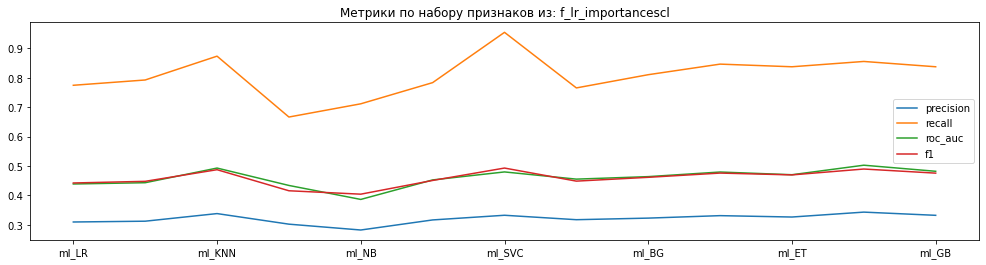

In [17]:
pd.DataFrame(ml_test_dict['f_lr_importances']).plot(title='Метрики по набору признаков из: f_lr_importancescl', figsize=(17, 4))


Проверим метрики на стандартизированных признаках

In [18]:
def ml_ss_tester(X_train, X_test, y_train, y_test, features_list):
    """Функция проводит обучение на разных моделях, и возвращает метрики
    features_list - список признаков,
    
    """
    
    X_train = X_train[features_list]
    X_test = X_test[features_list]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    metrixs_list = {}
    
    # Список моделей машинного обучения
    ml_LR = LogisticRegression( max_iter=2000, random_state=42)
    metrixs_list['ml_LR'] = ml_train(ml_LR, X_train, X_test, y_train, y_test)
    
    ml_LDA = LinearDiscriminantAnalysis()
    metrixs_list['ml_LDA'] = ml_train(ml_LDA, X_train, X_test, y_train, y_test)
    
    ml_KNN = KNeighborsClassifier()
    metrixs_list['ml_KNN'] = ml_train(ml_KNN, X_train, X_test, y_train, y_test)
    
    ml_CART = DecisionTreeClassifier(random_state=42)
    metrixs_list['ml_CART'] = ml_train(ml_CART, X_train, X_test, y_train, y_test)
    
    ml_NB = GaussianNB()
    metrixs_list['ml_NB'] = ml_train(ml_NB, X_train, X_test, y_train, y_test)
    
    ml_LSVC = LinearSVC(max_iter=100000, random_state=42)
    metrixs_list['ml_LSVC'] = ml_train(ml_LSVC, X_train, X_test, y_train, y_test)
    
    ml_SVC = SVC(random_state=42)
    metrixs_list['ml_SVC'] = ml_train(ml_SVC, X_train, X_test, y_train, y_test)
    
    ml_MLP = MLPClassifier(max_iter=2000, random_state=42)
    metrixs_list['ml_MLP'] = ml_train(ml_MLP, X_train, X_test, y_train, y_test)
    
    ml_BG = BaggingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_BG'] = ml_train(ml_BG, X_train, X_test, y_train, y_test)
    
    ml_RF = RandomForestClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_RF'] = ml_train(ml_RF, X_train, X_test, y_train, y_test)
    
    ml_ET = ExtraTreesClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_ET'] = ml_train(ml_ET, X_train, X_test, y_train, y_test)
    
    ml_AB = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
    metrixs_list['ml_AB'] = ml_train(ml_AB, X_train, X_test, y_train, y_test)
    
    ml_GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_GB'] = ml_train(ml_GB, X_train, X_test, y_train, y_test)

    return metrixs_list

In [19]:
features_list = ['f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances',
                 'f_pi_ra_importances', 'f_rfe_importances', 'fs_importances']
n=45 # Количество признаков

ml_test_stand_dict_ = {} # Словарь с метриками. Ключ: название метрики, Значение: Датафрейм с метриками

for feature in  features_list:
    print(f'Обучение стандартизированных данных на отборе {n} признаков из {feature}')
    metrixs_20_21 = ml_ss_tester(df_2020_full, df_2021_full, target_2020_01_full, target_2021_01_full, 
                          importances_feature_20[feature][:n])
    
    df_metrixs_20_21 = pd.DataFrame(metrixs_20_21).T
    ml_test_stand_dict_[feature] = df_metrixs_20_21
    display(df_metrixs_20_21)

Обучение стандартизированных данных на отборе 45 признаков из f_cl_importances


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [22, 89]]",0.32,0.80,0.45,0.45
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[23, 191], [12, 99]]",0.34,0.89,0.50,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_SVC,"[[2, 212], [4, 107]]",0.34,0.96,0.49,0.50
ml_MLP,"[[32, 182], [20, 91]]",0.33,0.82,0.48,0.47
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение стандартизированных данных на отборе 45 признаков из f_lr_importances


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [22, 89]]",0.32,0.80,0.45,0.45
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[23, 191], [12, 99]]",0.34,0.89,0.50,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_SVC,"[[2, 212], [4, 107]]",0.34,0.96,0.49,0.50
ml_MLP,"[[32, 182], [20, 91]]",0.33,0.82,0.48,0.47
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение стандартизированных данных на отборе 45 признаков из f_mi_importances


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [22, 89]]",0.32,0.80,0.45,0.45
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[23, 191], [12, 99]]",0.34,0.89,0.50,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_SVC,"[[2, 212], [4, 107]]",0.34,0.96,0.49,0.50
ml_MLP,"[[32, 182], [20, 91]]",0.33,0.82,0.48,0.47
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение стандартизированных данных на отборе 45 признаков из f_pi_f1_importances


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [22, 89]]",0.32,0.80,0.45,0.45
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[23, 191], [12, 99]]",0.34,0.89,0.50,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_SVC,"[[2, 212], [4, 107]]",0.34,0.96,0.49,0.50
ml_MLP,"[[32, 182], [20, 91]]",0.33,0.82,0.48,0.47
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение стандартизированных данных на отборе 45 признаков из f_pi_ra_importances


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [22, 89]]",0.32,0.80,0.45,0.45
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[23, 191], [12, 99]]",0.34,0.89,0.50,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_SVC,"[[2, 212], [4, 107]]",0.34,0.96,0.49,0.50
ml_MLP,"[[32, 182], [20, 91]]",0.33,0.82,0.48,0.47
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение стандартизированных данных на отборе 45 признаков из f_rfe_importances


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [22, 89]]",0.32,0.80,0.45,0.45
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[23, 191], [12, 99]]",0.34,0.89,0.50,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_SVC,"[[2, 212], [4, 107]]",0.34,0.96,0.49,0.50
ml_MLP,"[[32, 182], [20, 91]]",0.33,0.82,0.48,0.47
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


Обучение стандартизированных данных на отборе 45 признаков из fs_importances


,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[22, 192], [22, 89]]",0.32,0.80,0.45,0.45
ml_LDA,"[[20, 194], [23, 88]]",0.31,0.79,0.44,0.45
ml_KNN,"[[23, 191], [12, 99]]",0.34,0.89,0.50,0.49
ml_CART,"[[43, 171], [37, 74]]",0.30,0.67,0.43,0.42
ml_NB,"[[13, 201], [32, 79]]",0.28,0.71,0.39,0.40
ml_LSVC,"[[22, 192], [21, 90]]",0.32,0.81,0.46,0.46
ml_SVC,"[[2, 212], [4, 107]]",0.34,0.96,0.49,0.50
ml_MLP,"[[32, 182], [20, 91]]",0.33,0.82,0.48,0.47
ml_BG,"[[25, 189], [21, 90]]",0.32,0.81,0.46,0.46
ml_RF,"[[24, 190], [17, 94]]",0.33,0.85,0.48,0.48


К улучшению качества это не привело.

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Метрики на стандартизированных данных по набору признаков из: f_lr_importances'}>

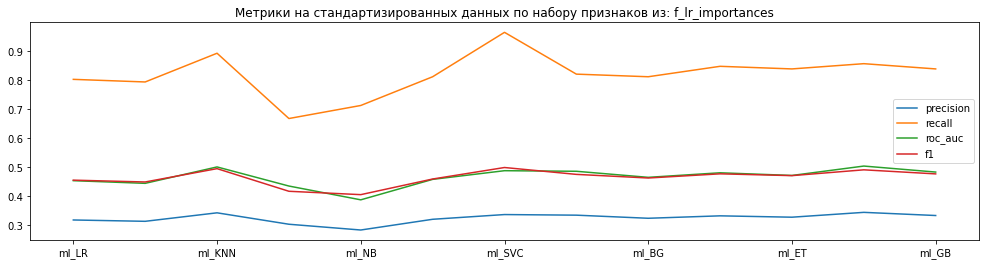

In [20]:
pd.DataFrame(ml_test_stand_dict_['f_lr_importances']).plot(title='Метрики на стандартизированных данных по набору признаков из: f_lr_importances', 
                                                           figsize=(17, 4))

**И с дополнительными признакми не дается мне 2021 год. Точность (precision) прогноза низкая.**

In [21]:
pay = {}
pay['t_2019'] = dict(target_2019_01_full.value_counts())
pay['t_2020'] = dict(target_2020_01_full.value_counts())
pay['t_2021'] = dict(target_2021_01_full.value_counts())

pd.DataFrame(pay)


,t_2019,t_2020,t_2021
1,195,247,111
0,130,78,214


**Рассмотрим какие признаки каждая модель считает наиболее важными, для этого дадим модели все признаки и посмотрим, что она выбирет**

In [22]:
# Будем рассматривать i признаков на выборке feat на data и target

feat = 'f_lr_importances'
i = 15 # количество наиболее важных признаков для отбора
data = df_2020_full
target = target_2020_01_full

# Данные будем собирать в словарь
selection_feature_of_models = {} 

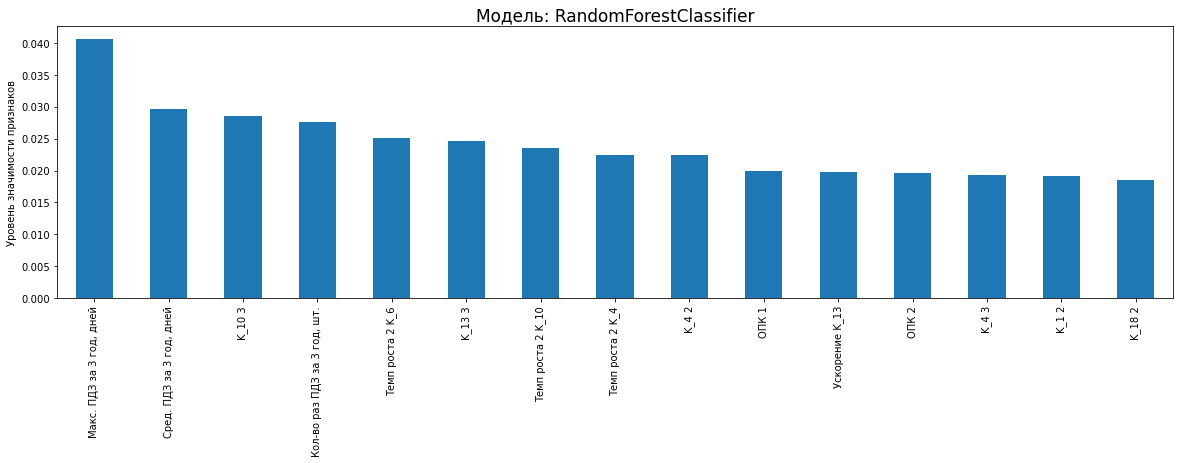

In [23]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(data[importances_feature_20[feat]], target)
RF_feaches = pd.Series(model_RF.feature_importances_)
RF_feaches.index = data[importances_feature_20[feat]].columns
RF_feaches = RF_feaches.sort_values(ascending=False)
selection_feature_of_models['RandomForestClassifier'] = RF_feaches

RF_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: RandomForestClassifier', fontsize = 17)
plt.show()



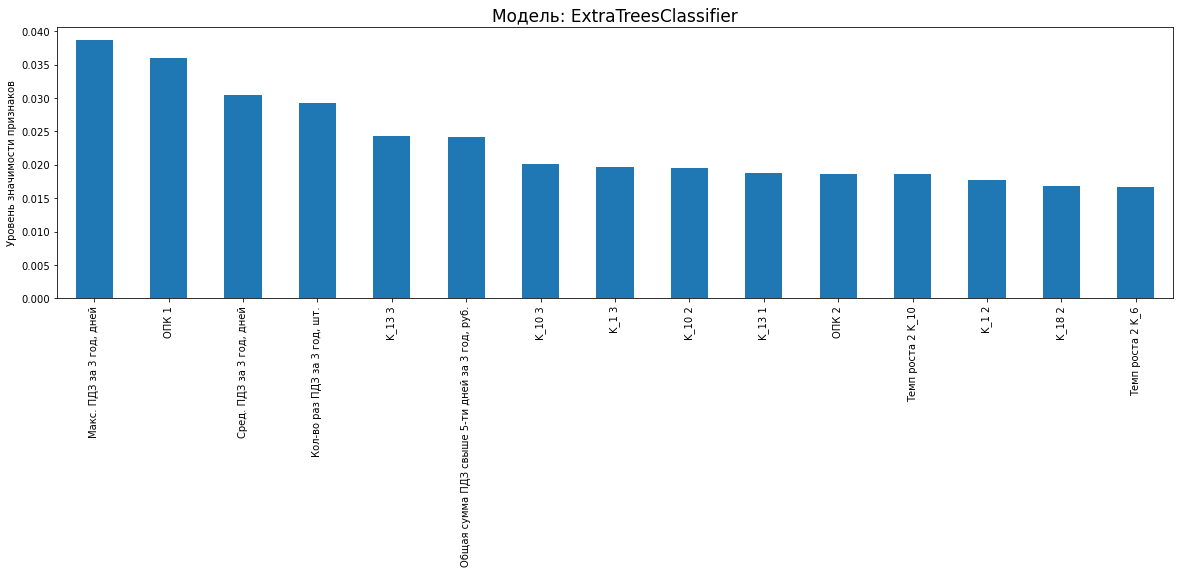

In [24]:
model_ET = ExtraTreesClassifier(n_estimators=100, random_state=42)
model_ET.fit(data[importances_feature_20[feat]], target)
ET_feaches = pd.Series(model_ET.feature_importances_)
ET_feaches.index = data[importances_feature_20[feat]].columns
ET_feaches = ET_feaches.sort_values(ascending=False)
selection_feature_of_models['ExtraTreesClassifier'] = ET_feaches

ET_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: ExtraTreesClassifier', fontsize = 17)
plt.show()

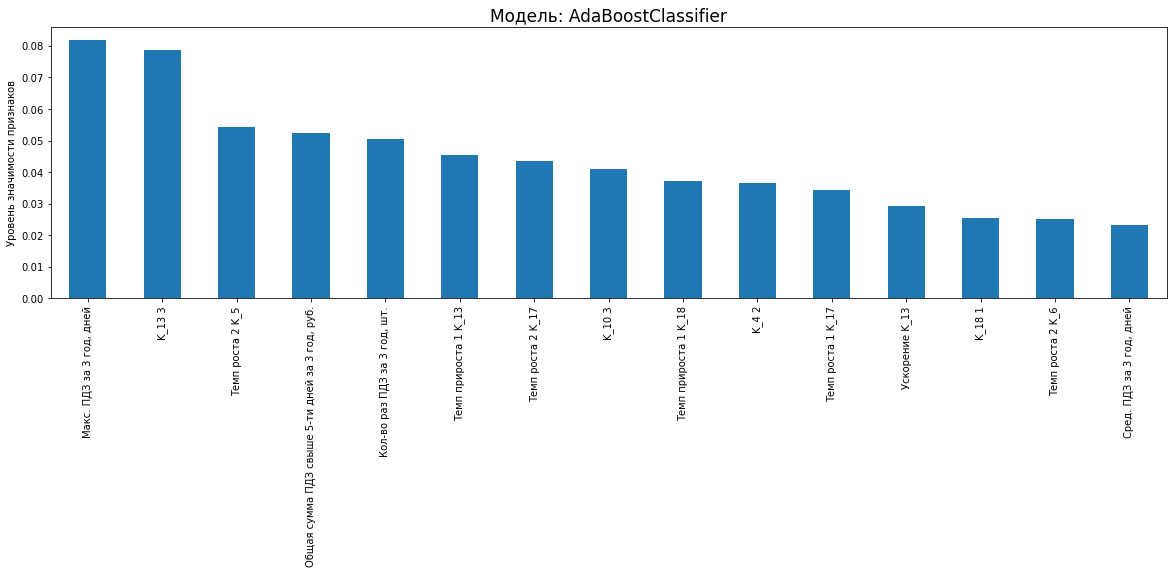

In [25]:
model_AB = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
model_AB.fit(data[importances_feature_20[feat]], target)
AB_feaches = pd.Series(model_AB.feature_importances_)
AB_feaches.index = data[importances_feature_20[feat]].columns
AB_feaches = AB_feaches.sort_values(ascending=False)
selection_feature_of_models['AdaBoostClassifier'] = AB_feaches

AB_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: AdaBoostClassifier', fontsize = 17)
plt.show()    

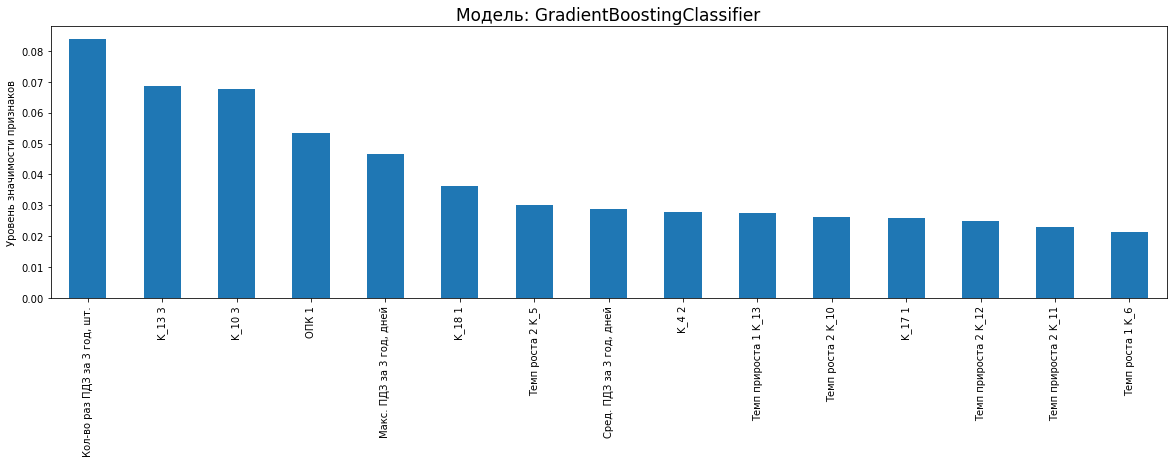

In [26]:
model_GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_GB.fit(data[importances_feature_20[feat]], target)
GB_feaches = pd.Series(model_GB.feature_importances_)
GB_feaches.index = data[importances_feature_20[feat]].columns
GB_feaches = GB_feaches.sort_values(ascending=False)
selection_feature_of_models['GradientBoostingClassifier'] = GB_feaches

GB_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: GradientBoostingClassifier', fontsize = 17)
plt.show()   

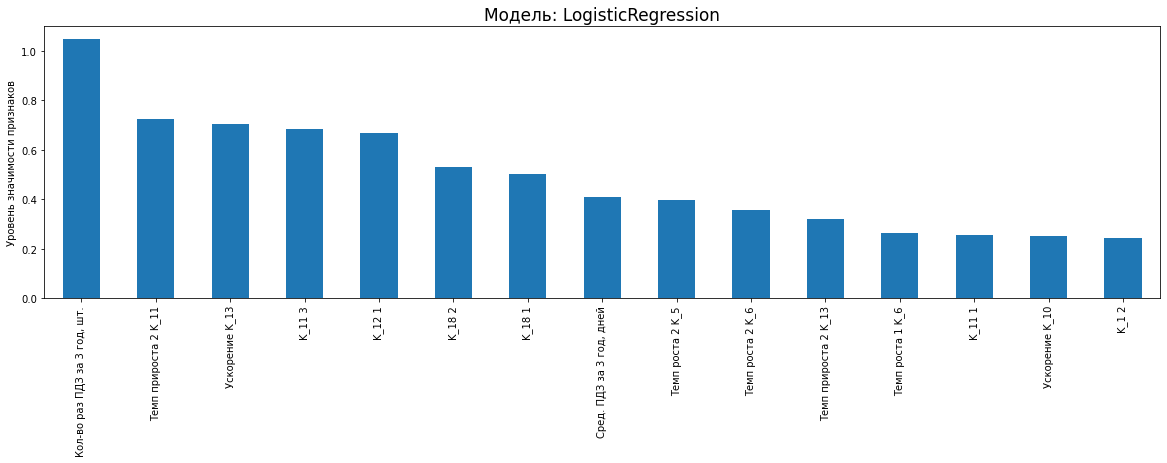

In [27]:
model_LR = LogisticRegression( max_iter=2000, random_state=42)
model_LR.fit(data[importances_feature_20[feat]], target)
LR_feaches = pd.Series(model_LR.coef_[0])
LR_feaches.index = data[importances_feature_20[feat]].columns
LR_feaches = LR_feaches.sort_values(ascending=False)
selection_feature_of_models['LogisticRegression'] = LR_feaches

LR_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: LogisticRegression', fontsize = 17)
plt.show() 

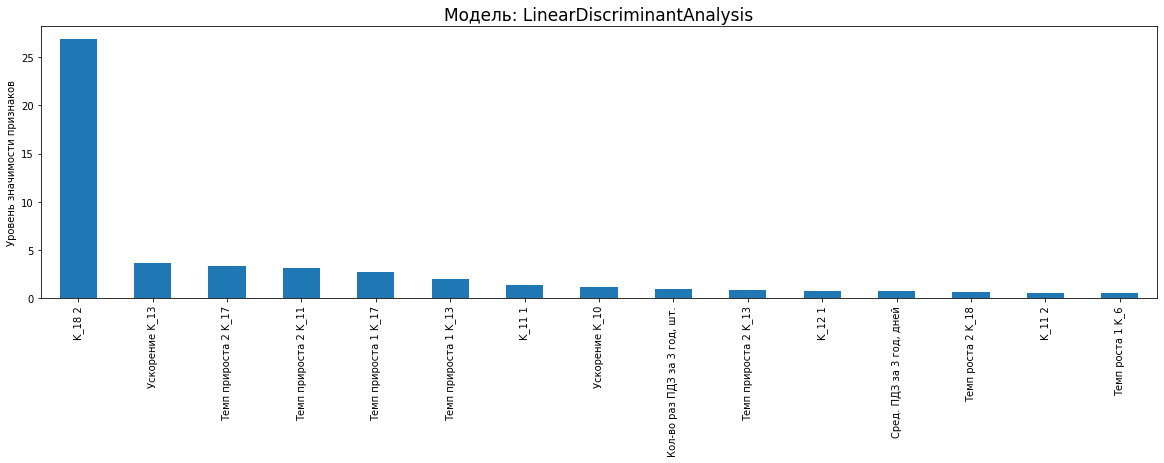

In [28]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(data[importances_feature_20[feat]], target)
LDA_feaches = pd.Series(model_LDA.coef_[0])
LDA_feaches.index = data[importances_feature_20[feat]].columns
LDA_feaches = LDA_feaches.sort_values(ascending=False)
selection_feature_of_models['LinearDiscriminantAnalysis'] = LDA_feaches

LDA_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: LinearDiscriminantAnalysis', fontsize = 17)
plt.show() 

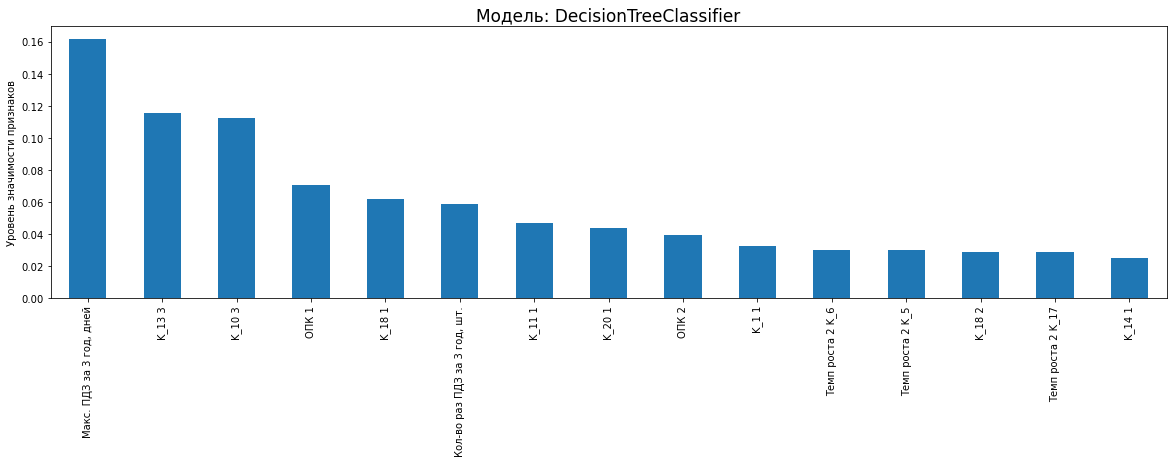

In [29]:
model_CART = DecisionTreeClassifier(random_state=42)
model_CART.fit(data[importances_feature_20[feat]], target)
CART_feaches = pd.Series(model_CART.feature_importances_)
CART_feaches.index = data[importances_feature_20[feat]].columns
CART_feaches = CART_feaches.sort_values(ascending=False)
selection_feature_of_models['DecisionTreeClassifier'] = CART_feaches

CART_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: DecisionTreeClassifier', fontsize = 17)
plt.show()

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


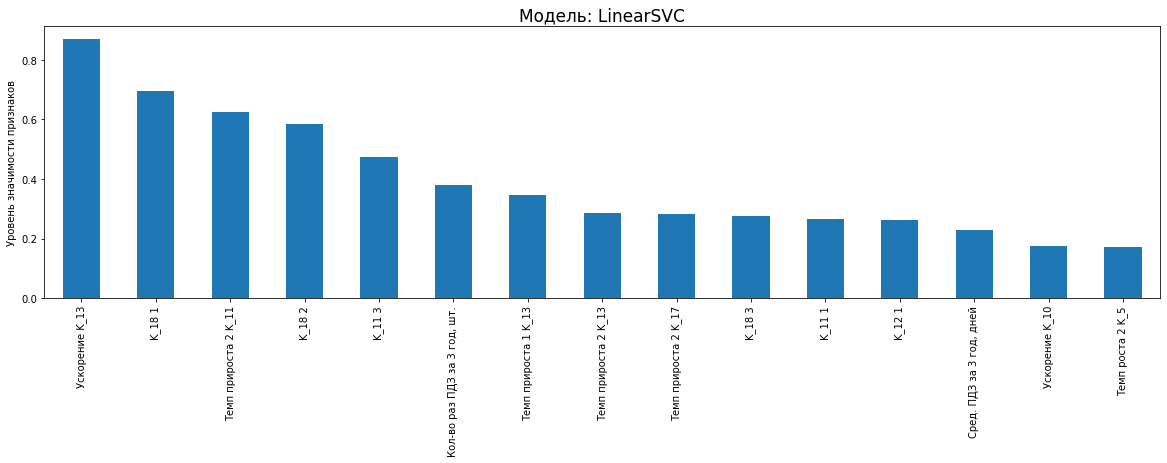

In [30]:
model_LSVC = LinearSVC(max_iter=100000, random_state=42)
model_LSVC.fit(data[importances_feature_20[feat]], target)
LSVC_feaches = pd.Series(model_LSVC.coef_[0])
LSVC_feaches.index = data[importances_feature_20[feat]].columns
LSVC_feaches = LSVC_feaches.sort_values(ascending=False)
selection_feature_of_models['LinearSVC'] = LSVC_feaches

LSVC_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: LinearSVC', fontsize = 17)
plt.show()

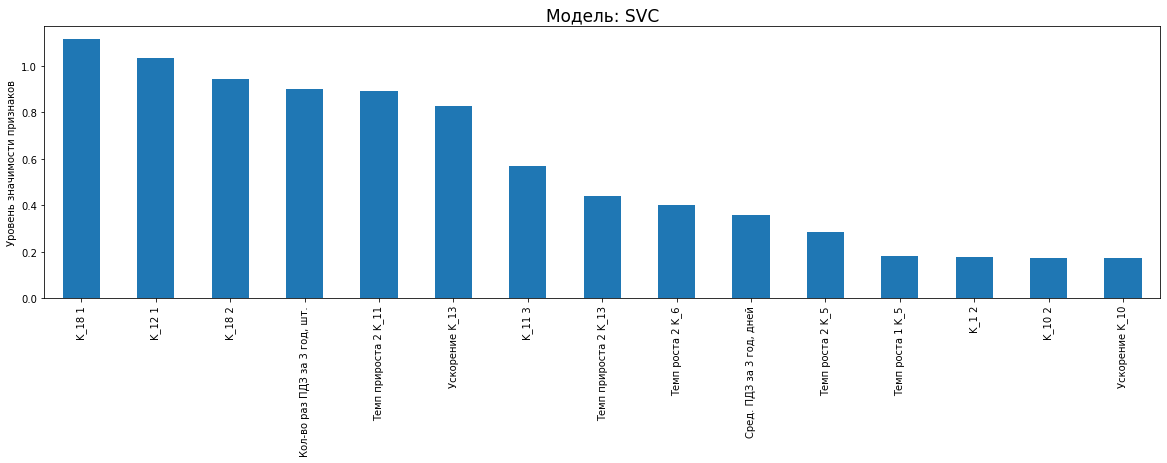

In [31]:
model_SVC = SVC(kernel='linear', random_state=42)
model_SVC.fit(data[importances_feature_20[feat]], target)
SVC_feaches = pd.Series(model_SVC.coef_[0])
SVC_feaches.index = data[importances_feature_20[feat]].columns
SVC_feaches = SVC_feaches.sort_values(ascending=False)
selection_feature_of_models['SVC'] = SVC_feaches

SVC_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: SVC', fontsize = 17)
plt.show()  

In [32]:
selection_feature = []
for key, value in selection_feature_of_models.items():
    selection_feature = selection_feature + list(value.index[:i])
 

In [33]:
selection_feature = dict((x, selection_feature.count(x)) for x in set(selection_feature) if selection_feature.count(x) > 1)

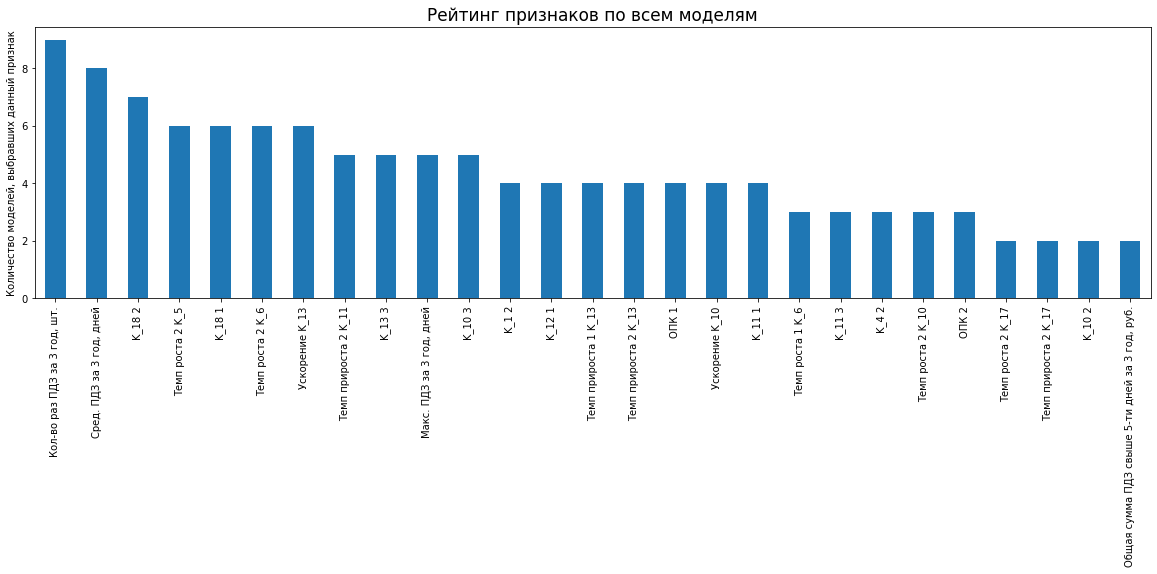

In [34]:
rating_feature = pd.Series(selection_feature).sort_values(ascending=False)
rating_feature.plot.bar(figsize=(20,5))
plt.ylabel('Количество моделей, выбравших данный признак')
plt.title('Рейтинг признаков по всем моделям', fontsize = 17)
plt.show()  

Модели оценили признаки по данным о задолжности контрагента в прошлом периоде. Метрики выросли, но совсем не на много. И изменения в confusion matrix.